### hangeul font fix

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,613 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

### Feature Selection 기법
* 피처값의 분포, 널, 피처간 높은 상관도, 결정값과의 독립성을 고려
* 모델의 피처 중요도(Feature Importance) 기반 - 주로 사용됨

##### SciKitLearn Feature Selection support

* RFE(Recursive Feature Elimination)
 - 모델 최초 학습 후 Feature중요도 선정
 - Feature중요도가 낮은 속성들을 차례로 제거해 가면서 반복적으로 학습/평가를 수행하여 최적 Feature추출
 - 수행시간이 오래 걸리고, 낮은 속성들을 제거해 나가는 메커니즘이 정확한 Feature를 찾는 목표에 정확히 부합하지 않을 수 있음
 - 데이터가 적은 경우만 사용하는것이 바람직.
 - 알고리즘이기 보다는 유틸리티 성격이다.

* SelectFromModel
 _ 모델 최초 학습 후 선정된 Feature Importance에 따라 평균/중앙값의 특정 비율 이상인 Feature들을 선택.

##### Recursive Feature Elimination 

In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE

# 분류 테스트를 위한 데이터셋 생성
from sklearn.datasets import make_classification  

In [3]:
X,y  = make_classification(n_samples=1000, n_features=25, n_informative=3, \
                           n_redundant=2, n_repeated=0, n_classes=8, \
                           n_clusters_per_class=1, random_state=0)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


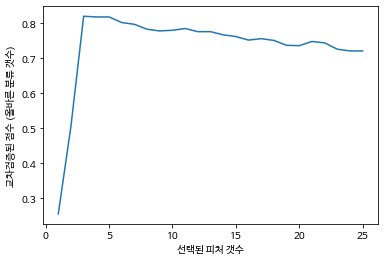

In [4]:
# SVC classifier선택
svc= SVC(kernel='linear')

# REFCV로 Feature들을 step=1, 한개씩 제거해나가면서 학습/평가 수행
# verbose=2 : Feature들을 선택하고 학습/평가의 수행결과를 순차적으로 보여줌
# cv=StratifiedKFold(2) - 2세트 폴더.

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=2)
rfecv.fit(X, y)

print("최적의 피처 수 : {0:d}".format(rfecv.n_features_))

plt.figure()
plt.xlabel("선택된 피처 갯수")
plt.ylabel("교차검증된 점수 (올바른 분류 갯수)")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [5]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=10000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


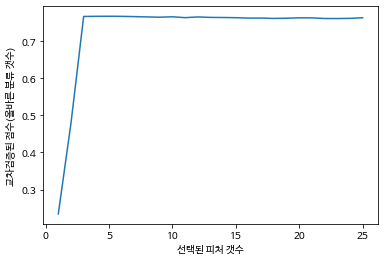

In [6]:
def show_feature_importance(estm, X, y):
  """
  Plot the feature importances
  """
  # REECV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행
  rfecv = RFECV(estimator=estm, step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=2)
  rfecv.fit(X, y)
  print("Optimal number of features : %d" % rfecv.n_features_)

  # Plot number of features VS. cross-validation scores
  plt.figure()
  plt.xlabel("선택된 피처 갯수")
  plt.ylabel("교차검증된 점수(올바른 분류 갯수)")
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
  plt.show()


# SVC classifier선택
svc = SVC(kernel='linear')
show_feature_importance(svc, X, y)

##### SelectFromModel

###### Read Evaluate Print Loop

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

X = [[ 0.87, -1.34,  0.31 ],
         [-2.79, -0.02, -0.85 ],
         [-1.34, -0.48, -2.55 ],
         [ 1.92,  1.48,  0.65 ]]
y = [0, 1, 0, 1]         

svc = LogisticRegression(C= 100, random_state=0)
selector = SelectFromModel(estimator=svc).fit(X, y)  # threshold값은 Default가 median값
display(selector.threshold_)  # 2.608842227039125
display("coefficient : ", selector.estimator_.coef_)  # array([[-1.80516357,  3.60230377,  2.41905934]])

display(selector.get_support())  # Threshold값 이상인것만 boolearn selection  ->  array([False,  True, False])


display(selector.transform(X))  # Reduce X to the selected features.  array([[-1.34],[-0.02],[-0.48],[ 1.48]])

2.608842227039125

'coefficient : '

array([[-1.80516357,  3.60230377,  2.41905934]])

array([False,  True, False])

array([[-1.34],
       [-0.02],
       [-0.48],
       [ 1.48]])

###### Model-based and sequential feature selection

In [1]:
def load_dataset():
  from sklearn.datasets import load_diabetes
  """
  Loading data
  """
  diabetes = load_diabetes()
  X = diabetes.data
  y = diabetes.target
  print(diabetes.DESCR)
  return X, y, diabetes

In [2]:
X, y, diabetes = load_dataset()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

###### Feature importance from coefficients
* LassoCV의 feature importance를 통해 가장 큰 `coef_` 절대값을 갖는 피처가 중요도가 큰 피처임.
* [선형모델의 회귀계수의 해석법 참조](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py)

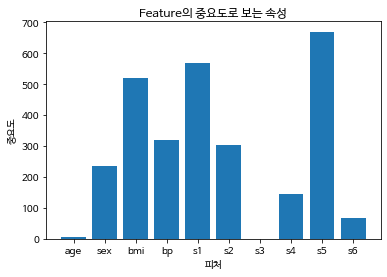

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
importances = np.abs(lasso.coef_)
feature_name = np.array(diabetes.feature_names)

plt.bar(x = feature_name, height=importances)
plt.title("Feature의 중요도로 보는 속성")
plt.ylabel("중요도")
plt.xlabel("피처")
plt.show()

###### Selecting features based on importance
* SelectFromModel의 threshold파라미터를 이용한 feature selection

In [5]:
from sklearn.feature_selection import SelectFromModel
from time import time

# 맨 뒤에서 세번째 인덱스의 ㄱ밧
# 올림차순으로 정렬되므로 값이 작은 순에서 높은 순으로 정렬
threshold = np.sort(importances)[-3] + 0.01  
display("threshold value : ", threshold)
display("정렬된 결과 :", np.sort(importances))
startTime = time()
sfm = SelectFromModel(estimator=lasso, threshold=threshold).fit(X, y)
endTime = time()

# sfm.get_support() - threshold값 이상인 상관계수의 인덱스를 리턴
print("Feature Selected by SelectFromModel : " f"{feature_name[sfm.get_support()]}")
print(f"Done in {endTime - startTime:.3f}s")

'threshold value : '

521.748542606749

'정렬된 결과 :'

array([  0.        ,   6.49684455,  66.83430445, 143.6995665 ,
       235.99640534, 302.45627915, 321.06689245, 521.73854261,
       569.4426838 , 669.92633112])

Feature Selected by SelectFromModel : ['s1' 's5']
Done in 0.112s


#### Permutation Importance
* 단일피처의 값이 무작위로 섞일때 모델의 점수를 낮추도록 정의됨으로써 해당 단일 피처가 얼마나 중요한 피처인지를 알수 있음
* [순열 기능 중요도](https://scikit-learn.org/stable/modules/permutation_importance.html)

In [3]:
X, y, diabetes = load_dataset()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [8]:
def fit_pred_ridge(X, y):
  from sklearn.linear_model import Ridge
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import r2_score
  import numpy as np
  """
  1.Split train and test dataset
  2.Fit and Predict
  """
  X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state = 0)

  # 학습, 예측, r2_score
  model = Ridge(alpha=1e-2).fit(X_train, y_train)
  y_pred = model.predict(X_val)
  print("R2 Score : ", r2_score(y_val, y_pred))
  print("Model Score : ", model.score(X_val, y_val))
  return model, X_val, y_val

In [5]:
model,X_val, y_val = fit_pred_ridge(X, y)

R2 Score :  0.35666062386954556
Model Score :  0.35666062386954556


In [6]:
from sklearn.inspection import permutation_importance

help(permutation_importance)

Help on function permutation_importance in module sklearn.inspection._permutation_importance:

permutation_importance(estimator, X, y, scoring=None, n_repeats=5, n_jobs=None, random_state=None)
    Permutation importance for feature evaluation [BRE]_.
    
    The :term:`estimator` is required to be a fitted estimator. `X` can be the
    data set used to train the estimator or a hold-out set. The permutation
    importance of a feature is calculated as follows. First, a baseline metric,
    defined by :term:`scoring`, is evaluated on a (potentially different)
    dataset defined by the `X`. Next, a feature column from the validation set
    is permuted and the metric is evaluated again. The permutation importance
    is defined to be the difference between the baseline metric and metric from
    permutating the feature column.
    
    Read more in the :ref:`User Guide <permutation_importance>`.
    
    Parameters
    ----------
    estimator : object
        An estimator that has alr

In [10]:
# 리턴값은 importances_mean, importances_std, importances각각 키로 갖고, ndarray타입
# n_repeats : 피처를 순열할 횟수
# 검증 데이터를 사용.
import numpy as np
r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)
display(r.importances_mean)
display(r.importances_mean.argsort()[::-1])   # 올림차순으로 기본 정렬한것을 역순으로 정렬

# 중요도가 가장 큰 순으로 
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(diabetes.feature_names[i], " " , np.round(r.importances_mean[i], 4), " +/-", np.round(r.importances_std[i], 5))

array([-0.00199267,  0.05587407,  0.17579   ,  0.08836513,  0.04221134,
        0.00203626,  0.00203754,  0.00318695,  0.20423412,  0.00278683])

array([8, 2, 3, 1, 4, 7, 9, 6, 5, 0])

s5   0.2042  +/- 0.04965
bmi   0.1758  +/- 0.0484
bp   0.0884  +/- 0.03284
sex   0.0559  +/- 0.02319


In [20]:
def show_permutation_importance(model, X_val, y_val, repeats=None):
  from sklearn.inspection import permutation_importance
  """
  show the feature importance mean and standard deviation by every featue
  리턴값은 importances_mean, importances_std, importances각각 키로 갖고, ndarray타입
  n_repeats - 무작위로 피처를 섞는 횟수
  """
  r = permutation_importance(estimator=model, X=X_val, y=y_val, n_repeats=repeats,random_state=0)
  for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0 :
      print(diabetes.feature_names[i], " ", np.round(r.importances_mean[i], 4), " +/-", np.round(r.importances_std[i], 5))

show_permutation_importance(model, X_val, y_val, 50)

s5   0.1956  +/- 0.05065
bmi   0.1669  +/- 0.05188
bp   0.0891  +/- 0.03198
sex   0.0549  +/- 0.02046


In [21]:
show_permutation_importance(model, X_val, y_val, 100)

s5   0.2015  +/- 0.04552
bmi   0.171  +/- 0.05521
bp   0.0891  +/- 0.03232
sex   0.0527  +/- 0.02134


In [22]:
show_permutation_importance(model, X_val, y_val, 30)

s5   0.2042  +/- 0.04965
bmi   0.1758  +/- 0.0484
bp   0.0884  +/- 0.03284
sex   0.0559  +/- 0.02319


In [11]:
r.importances_mean

array([-0.00199267,  0.05587407,  0.17579   ,  0.08836513,  0.04221134,
        0.00203626,  0.00203754,  0.00318695,  0.20423412,  0.00278683])

* `n_repeats`는 수가 늘어날수록 `Feature Importance`값과의 관계는 ?
* `Feature Importance`가 `Feature Selection`의 절대적 기준이 될수 있는가?
-> `feature importance`는 트리기반의,정보이득 혹은 지니계수를 통해 노드를 분할하는 모델의 측면에서는 중요하지만, 완벽한 기준은 될수가 없기때문에서 `Permutation Importance` 기법을 사용하는 것

#### Permutation Importance vs Random Forest Feature Importance
* [사이킷런 예제](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [13]:
# titanic 데이터 세트 로딩. 
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

rng = np.random.RandomState(seed=42)
# 3가지 값으로 category값 random 설정. 
X['random_cat'] = rng.randint(3, size=X.shape[0])
# X건수만큼 고유한 random 값 설정. 
X['random_num'] = rng.randn(X.shape[0])

categorical_columns = ['pclass', 'sex', 'embarked', 'random_cat']
numerical_columns = ['age', 'sibsp', 'parch', 'fare', 'random_num']

X = X[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

# Null 값 처리, category 값 encoding 
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

# 데이터 전처리 후 RandomForest로 학습 
rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                        

In [14]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.817


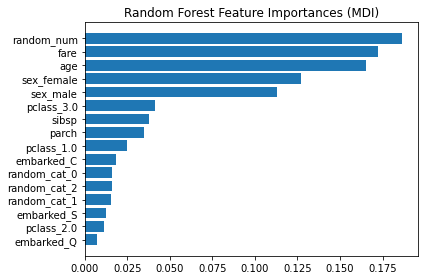

In [15]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

* 불순 feature인 `random_num`가 피처 중요도 최상단에 위치한다.

##### 검증 데이터 세트로 permutation importance 수행

> 위의 결과보다는 더 나은 결과를 보여줌을 알 수 있다.



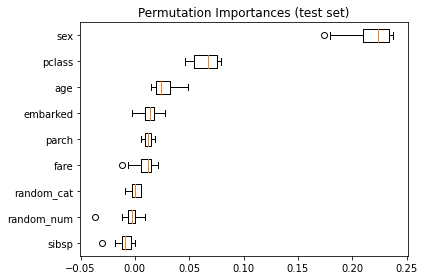

In [16]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()